# Lab 1B: Data Cleaning

**WHAT** This nonmandatory lab consists of several programming and insight exercises/questions.

**WHY** The exercises are meant to familiarize yourself with the basic concepts of data cleaning.

**HOW** Follow the exercises in this notebook either on your own or with a fellow student. If you want to skip right to questions and exercises, find the $\rightarrow$ symbol. 

$\newcommand{\q}[1]{\rightarrow \textbf{Question #1}}$
$\newcommand{\ex}[1]{\rightarrow \textbf{Exercise #1}}$

In this assignment, we will take a look at the LendingClub data set. This data corresponds to applications for loans issued in 2016. In order to use this data later for classification of loan applicants, we need to first explore and clean this data. 
Work your way through these exercises at your own pace and be sure to ask questions to the TA's when you don't understand something.

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Reading the Data

We first start by reading the data from the LendingClub file provided in the assignemnt folder. 

In [3]:
#reading the raw data
df = pd.read_csv('./LendingClub.csv')
df.head()

,loan_amnt,annual_inc,settlement_amount,term,int_rate,installment,grade,sub_grade,home_ownership,loan_status,fico_range_low,fico_range_high,title,zip_code,addr_state,earliest_cr_line,dti,total_acc,total_bc_limit,bc_util
0,7200.0,51104.0,NaN,36 months,11.49,237.40,B,B5,RENT,Fully Paid,695.0,699.0,Debt consolidation,100xx,NY,Dec-2004,29.59,32.0,10500.0,78.6
1,16800.0,42000.0,NaN,36 months,17.27,601.23,D,D2,RENT,Fully Paid,675.0,679.0,Debt consolidation,773xx,TX,Jun-2011,25.91,18.0,6800.0,68.6
2,8000.0,42000.0,NaN,36 months,6.49,245.16,A,A2,MORTGAGE,Fully Paid,720.0,724.0,Credit card refinancing,229xx,VA,Aug-2008,16.34,9.0,11100.0,50.2
3,14000.0,56000.0,5896.09,60 months,13.67,323.37,C,C3,MORTGAGE,Charged Off,660.0,664.0,Debt consolidation,189xx,PA,Mar-1997,19.41,34.0,19400.0,47.4
4,11975.0,60000.0,NaN,36 months,7.39,371.90,A,A4,RENT,Fully Paid,690.0,694.0,Debt consolidation,606xx,IL,Jun-1999,11.66,26.0,56800.0,43.7


We then load the data dictionary. This dictionary provides a brief description of the features in the dataset

$\ex{1.1}$ Load the data dictionary from the csv file provided

In [4]:
data_dictionary = None
# START ANSWER
data_dictionary = pd.read_csv('./DataDictionary.csv')
# END ANSWER

data_dictionary

,name,description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,bc_util,Ratio of total current balance to high credit/...
3,dti,A ratio calculated using the borrower’s total ...
4,earliest_cr_line,The month the borrower's earliest reported cre...
5,fico_range_high,The upper boundary range the borrower’s FICO a...
6,fico_range_low,The lower boundary range the borrower’s FICO a...
7,grade,LC assigned loan grade
8,home_ownership,The home ownership status provided by the borr...
9,installment,The monthly payment owed by the borrower if th...


## 2. Explore Data

$\ex{2.1}$ How many samples and features does the dataset contain?

*Hint: Take a look at the pandas.DataFrame in the Pandas API reference scroll down to look at the list of attributes and methods, to familiarize yourself*

In [5]:
# START ANSWER
df.shape
# END ANSWER

(217472, 20)

$\ex{2.2}$ Print the names of the features and their corresponding data types

In [6]:
# START ANSWER
df.dtypes
# END ANSWER

loan_amnt            float64
annual_inc           float64
settlement_amount    float64
term                  object
int_rate             float64
installment          float64
grade                 object
sub_grade             object
home_ownership        object
loan_status           object
fico_range_low       float64
fico_range_high      float64
title                 object
zip_code              object
addr_state            object
earliest_cr_line      object
dti                  float64
total_acc            float64
total_bc_limit       float64
bc_util              float64
dtype: object

## 3. Removing unwanted observations

Lets take a look at **loan_status** feature.

$\ex{3.1}$ Find the possible values that the feature takes and their respective frequencies

*Hint: Pandas objects have a method that can do this for you*

In [7]:
# START ANSWER
df['loan_status'].value_counts()
# END ANSWER

Fully Paid            112418
Current                67084
Charged Off            34364
Late (31-120 days)      2252
In Grace Period          885
Late (16-30 days)        461
Default                    8
Name: loan_status, dtype: int64

This information can be visualized in the form of a histogram. Below we use the countplot function from the seaborn library to create this figure.

Text(0, 0.5, 'Loan Amount')

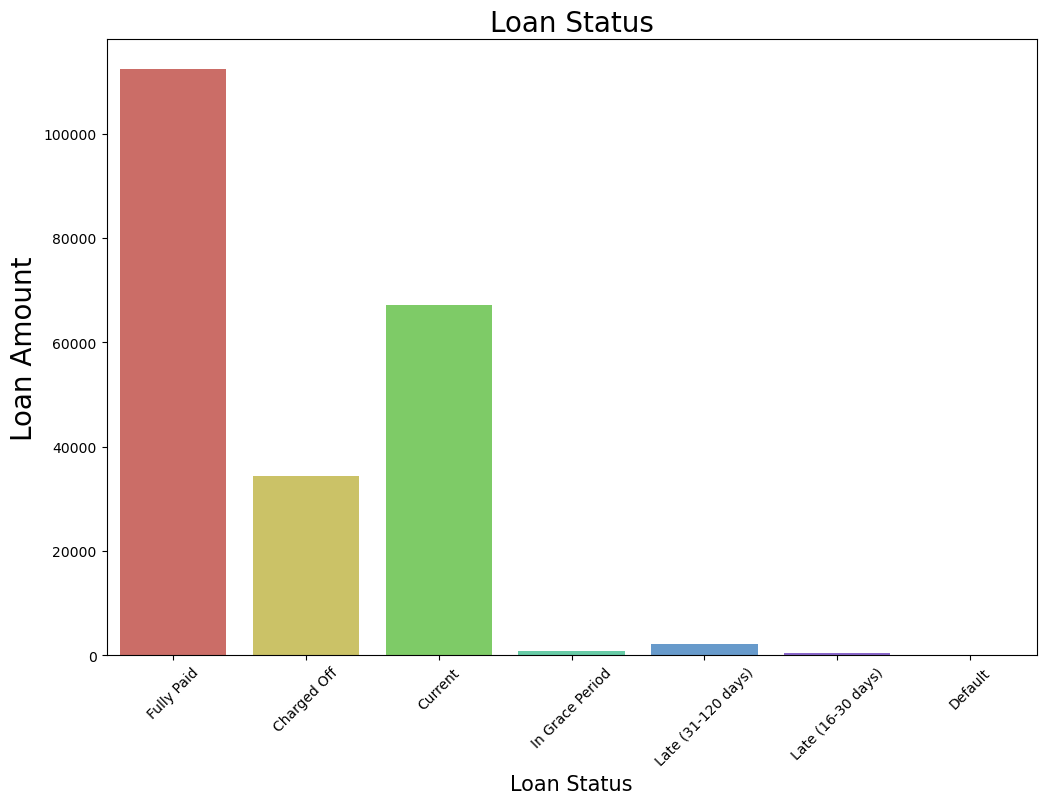

In [8]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

This data is going to be used to predict if a loan is going to be repaid or not based on the loan application. Therefore, we want to make sure that the samples that we use are relevant to making this prediction.

The samples with the  **loan_status = "Current"** correspond to loans whiach are still active.
These samples can be removed as they do not help in predicting if a loan has been repaid or not.

$\ex{3.2}$ Remove the samples that have **loan_status = Current** from the dataframe

In [11]:
# START ANSWER
df = df[df['loan_status'] != 'Current']
# END ANSWER

We want to do an analysis for the Pacific Coast states California, Oregon, and Washington (not DC!)

$\ex{3.3}$ Select the appropriate subset of samples

In [12]:
# START ANSWER
df = df[(df['addr_state'] == 'CA') | (df['addr_state'] == 'OR' ) | (df['addr_state'] =='WA')]
# END ANSWER

## 4. Handling Duplicate Observations

Next we want to make sure that there are no duplicate samples in the dataset.

$\ex{4.1}$ Find and print the duplicate observations in the dataset

*Hint: Take a look at the pandas library*

In [13]:
# START ANSWER
df[df.duplicated()]
# END ANSWER

,loan_amnt,annual_inc,settlement_amount,term,int_rate,installment,grade,sub_grade,home_ownership,loan_status,fico_range_low,fico_range_high,title,zip_code,addr_state,earliest_cr_line,dti,total_acc,total_bc_limit,bc_util
210621,5000.0,116000.0,NaN,36 months,8.24,157.24,B,B1,MORTGAGE,Fully Paid,685.0,689.0,Credit card refinancing,928xx,CA,Dec-1997,13.17,24.0,20900.0,43.8
217471,10000.0,40000.0,NaN,36 months,12.99,336.90,C,C2,RENT,Charged Off,665.0,669.0,Medical expenses,950xx,CA,Sep-1996,21.06,28.0,4300.0,73.2


$\ex{4.2}$ Now remove the duplicates from the dataframe

In [14]:
# START ANSWER
df = df.drop_duplicates()
# END ANSWER

## 5. Detecting and Dealing with Highly Correlated Features

Features that are highly correlated to each other do not provide much additional information to the data but they do add complexity. 

$\ex{5.1}$ Compute the correlation matrix for the numeric features and make a heatmap to visualize this.

*Hint: Take a look at the heatmap function in the seaborn library*

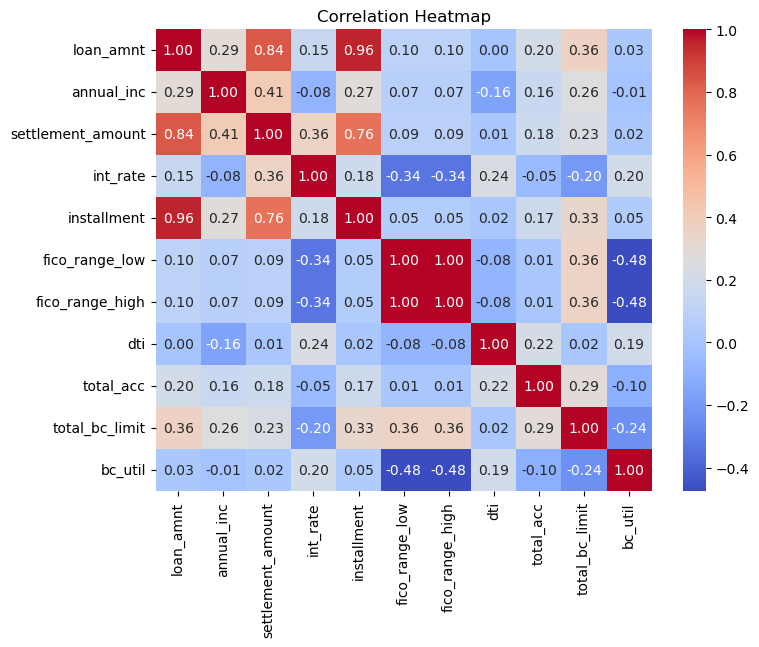

In [17]:
correlation_matrix = None

# START ANSWER
correlation_matrix = df.corr()
# END ANSWER

plt.figure(figsize=(8, 6))

# Plot the correlation heatmap
# START ANSWER
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# END ANSWER
plt.title('Correlation Heatmap')
plt.show()


$\ex{5.2}$ Can you identify the features that have a high correlation?

To ensure that there is no redunt information we want to keep only one of the features in each pair of highly correlated features. 

$\ex{5.3}$ Add code below to remove one of the features in each pair.

In [18]:
# START ANSWER
drop_list_correlated = ["installment","fico_range_high"]
df = df.drop(drop_list_correlated, axis=1)
# END ANSWER

Above we dealt with the numeric features which had a high correlation. Let's take a look at the non-numeric features.

In [19]:
object_columns = df.columns[df.dtypes == 'object']
df[object_columns]

,term,grade,sub_grade,home_ownership,loan_status,title,zip_code,addr_state,earliest_cr_line
5,36 months,B,B3,RENT,Fully Paid,Credit card refinancing,982xx,WA,Jul-2007
10,36 months,E,E1,RENT,Fully Paid,Debt consolidation,919xx,CA,Apr-1995
15,36 months,B,B2,MORTGAGE,Fully Paid,Debt consolidation,923xx,CA,May-1985
35,60 months,D,D2,MORTGAGE,Fully Paid,Home improvement,926xx,CA,Aug-1999
44,36 months,C,C1,RENT,Charged Off,Debt consolidation,917xx,CA,Jun-2001
...,...,...,...,...,...,...,...,...,...
217447,36 months,C,C3,RENT,Charged Off,Debt consolidation,941xx,CA,Jan-1996
217451,36 months,B,B3,RENT,Fully Paid,Debt consolidation,945xx,CA,Jul-2008
217452,60 months,D,D5,MORTGAGE,Fully Paid,Home improvement,953xx,CA,Apr-1979
217455,36 months,B,B3,RENT,Fully Paid,Credit card refinancing,951xx,CA,Nov-2003


$\ex{5.4}$ Can you identify the feature that can be removed without removing any information from the dataset (there is a feature providing redundant information)? Remove this feature from the dataframe.

In [20]:
# Remove the redundant non-numeric feature
# START ANSWER
df = df.drop(['grade'], axis =1)
# END ANSWER

## 6. Dealing with missing data

Another major aspect of data cleaning is handling missing values. There are several ways in which this can be done. We will explore a few different scenarios below.

$\ex{6.1}$ Find the number of null values in each feature

In [21]:
# START ANSWER
null_count = df.isnull().sum()
null_count
# END ANSWER

loan_amnt                0
annual_inc               0
settlement_amount    24688
term                     0
int_rate                 0
sub_grade                0
home_ownership           0
loan_status              0
fico_range_low           0
title                 1442
zip_code                 0
addr_state               0
earliest_cr_line         0
dti                      1
total_acc                0
total_bc_limit           0
bc_util                288
dtype: int64

Features that have a high percentage of NaN values are not reliable for prediction. These features are usually removed from the dataset.

$\ex{6.2}$ Remove the feature that has more than 25% missing values

In [22]:
# START ANSWER
df = df.drop(['settlement_amount'], axis=1)
# END ANSWER

First we inspect the categorical feature **title**

In [23]:
df['title'].value_counts()

Debt consolidation         14166
Credit card refinancing     4790
Other                       1738
Home improvement            1476
Major purchase               528
Business                     320
Medical expenses             306
Car financing                257
Moving and relocation        225
Vacation                     214
Home buying                  125
Green loan                    19
Name: title, dtype: int64

The most appropriate value to replace the NaNs with for title is Other.

$\ex{6.3}$  Raplace the NaN values corresponding to the feature **title** with "Other"

*Hint: take a look at the fillna() method in pandas*

In [25]:
# START ANSWER
df['title'].fillna(value="Other", inplace=True)
# END ANSWER

Now lets take a look at the **dti** feature. Since only 1 sample has a NaN value for this feature, we can handle them by removing this sample.

$\ex{6.4}$ Remove the samples with NaN values for **dti**

In [26]:
# START ANSWER
df.dropna(subset=["dti"], inplace=True)
# END ANSWER
df.shape

(25605, 16)

The final feature with missing values is **bc_util**. This is a numeric feature that has a significant number of NaN values. In order to handle this, we will replace this value with an appropriate metric.

$\ex{6.5}$ Can you think of some apppropriate value that could be used to replace the missing values?

$\ex{6.6}$ Find the mean, median and standard deviation of the values of this feature

In [27]:
mean_value = None
median_value = None
standard_deviation = None

# START ANSWER
mean_value = df['bc_util'].mean()
median_value = df['bc_util'].median()
standard_deviation = df['bc_util'].std()
# END ANSWER

print("Median:", median_value)
print("Mean:", mean_value)
print("Standard Deviation:", standard_deviation)

Median: 58.7
Mean: 57.214583086463904
Standard Deviation: 28.480181198896673


$\ex{6.7}$ Plot the histogram for this feature.

*Hint: You can use the plot.hist() method in pandas*

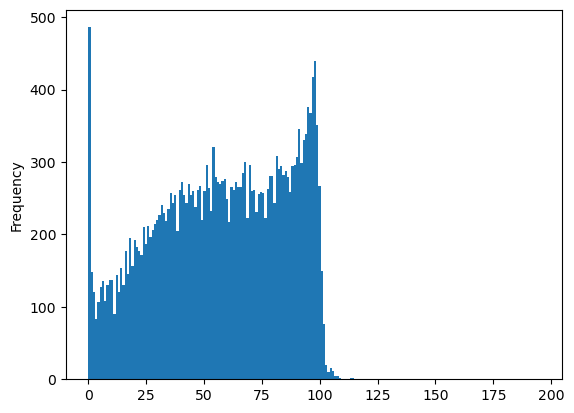

In [28]:
# START ANSWER
df['bc_util'].plot.hist(bins=200)
plt.show()
# END ANSWER

$\ex{6.8}$ Replace the missing values with a suitable value. What value did you choose?

In [30]:
# START ANSWER
df['bc_util'].fillna(value=mean_value, inplace=True)
# END ANSWER

## 7. Removing features with little predictive value

Sometimes, based on the problem setting, some features do not provide helpful information in terms of prediction. In these cases the features are removed in order to simplify the dataset.

$\ex{7.1}$ Can you identify 2 least useful features in this case? 